In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ACCIDENT_2011 = pd.read_csv("ACCIDENT 2011.csv",encoding='latin-1')
ACCIDENT_2012 = pd.read_csv("ACCIDENT 2012.csv",encoding='latin-1')
ACCIDENT_2013 = pd.read_csv("ACCIDENT 2013.csv",encoding='latin-1')
ACCIDENT_2014 = pd.read_csv("ACCIDENT 2014.csv",encoding='latin-1')
ACCIDENT_2015 = pd.read_csv("ACCIDENT 2015.csv",encoding='latin-1')
ACCIDENT_2016 = pd.read_csv("ACCIDENT 2016.csv",encoding='latin-1')
ACCIDENT_2017 = pd.read_csv("ACCIDENT 2017.csv",encoding='latin-1')
ACCIDENT_2018 = pd.read_csv("ACCIDENT 2018.csv",encoding='latin-1')
ACCIDENT_2019 = pd.read_csv("ACCIDENT 2019.csv",encoding='latin-1')
ACCIDENT_2020 = pd.read_csv("ACCIDENT 2020.csv",encoding='latin-1')
ACCIDENT_2021 = pd.read_csv("ACCIDENT 2021.csv",encoding='latin-1')

In [3]:
#list dataframe you want to append
frame = [ACCIDENT_2011, ACCIDENT_2012, ACCIDENT_2013, ACCIDENT_2014, ACCIDENT_2015, ACCIDENT_2016, ACCIDENT_2017, ACCIDENT_2018, ACCIDENT_2019, ACCIDENT_2020, ACCIDENT_2021]

#new dataframe to store append result
myDataFrame = pd.DataFrame()

for df in frame:
    myDataFrame = myDataFrame.append(df)

In [4]:
len(myDataFrame)

365826

In [5]:
myDataFrame.shape

(365826, 117)

In [6]:
accident = myDataFrame

In [7]:
#Analysing accident data fatalities using Regression, LDA, random forest and boosting

In [8]:
accident.head()

,ST_CASE,YEAR,STATE,COUNTY,FATALS,A_CRAINJ,A_REGION,A_RU,A_INTER,A_RELRD,...,NOT_MIN,NOT_MINNAME,ARR_HOUR,ARR_HOURNAME,ARR_MIN,ARR_MINNAME,HOSP_HR,HOSP_HRNAME,HOSP_MN,HOSP_MNNAME
0,10001,2011,1,5,1,1.0,4.0,1.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10002,2011,1,73,1,1.0,4.0,2.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10003,2011,1,97,2,1.0,4.0,2.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10005,2011,1,15,1,1.0,4.0,2.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10006,2011,1,71,1,1.0,4.0,1.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#load data
accident = pd.read_csv("accident.csv", low_memory=False, encoding='latin-1')

In [10]:
accident['FATAL_RATE'] = np.where(accident['PERSONS']*(0.5) <= accident['FATALS'], 1, 0)

In [11]:
# accident['FATAL_RATE'] = accident['PERSONS']/accident['FATALS']

In [12]:
X = accident[['STATE','ST_CASE','PEDS','PERNOTMVIT','VE_TOTAL','VE_FORMS','PVH_INVL','PERSONS','PERMVIT','COUNTY','CITY','MONTH','DAY','DAYNAME','DAY_WEEK','YEAR','HOUR','MINUTE','ROUTE','RUR_URB','FUNC_SYS','RD_OWNER','NHS','SP_JUR','MILEPT','HARM_EV','MAN_COLL','RELJCT1','RELJCT2','TYP_INT','REL_ROAD','WRK_ZONE','LGT_COND','WEATHER','SCH_BUS','NOT_HOUR','NOT_MIN','ARR_HOUR','ARR_MIN','HOSP_HR','HOSP_MN','FATALS']]
y = accident['FATAL_RATE']

In [13]:
# convert the independent variables to categorical variables
X = pd.get_dummies(X, columns=['STATE','PERNOTMVIT','VE_FORMS','PVH_INVL','PERSONS','COUNTY','CITY','MONTH','DAY','DAY_WEEK','YEAR','HOUR','MINUTE','ROUTE','RUR_URB','FUNC_SYS','RD_OWNER','NHS','SP_JUR','MILEPT','HARM_EV','MAN_COLL','RELJCT1','RELJCT2','TYP_INT','REL_ROAD','WRK_ZONE','LGT_COND','WEATHER','SCH_BUS','ARR_MIN','HOSP_HR','HOSP_MN','FATALS'])

In [14]:
from sklearn.model_selection import train_test_split

# Split the data into a training set and a temporary set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary set into a validation set and a test set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Helper Functions

In [15]:
def OSR2(y_train, y_test, y_pred):
    
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

In [16]:
def MAE(y_test, y_pred):
    
    return (np.mean(abs(y_test - y_pred)))

In [17]:
def RMSE(y_test, y_pred):
    
    return np.sqrt(np.mean((y_test - y_pred)**2))

## PCA (Significant columns)

In [18]:
from sklearn.decomposition import PCA

# Fit PCA on the training set
# Filter the components to 20
pca_temp = PCA(n_components=20)
pca_temp.fit(X_train)
        
# Transform the training, validation, and test sets using the fitted PCA model
X_train_reduced = pca_temp.transform(X_train)
X_val_reduced = pca_temp.transform(X_val)
X_test_reduced = pca_temp.transform(X_test)

# Print the shape of the reduced feature matrix for each set
print("Shape of X_train:", X_train.shape[1])
print("Shape of X_train_reduced:", X_train_reduced.shape[1])
print("Shape of X_val_reduced:", X_val_reduced.shape[1])

Shape of X_train: 5403
Shape of X_train_reduced: 20
Shape of X_val_reduced: 20


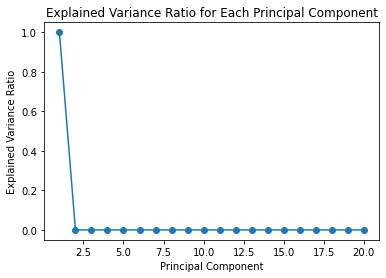

In [19]:
import matplotlib.pyplot as plt

# Plot the explained variance ratio for each principal component
plt.plot(range(1, 21), pca_temp.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

## PCA

In [20]:
from sklearn.decomposition import PCA

# Fit PCA on the training set
# Filter the components to 2
pca = PCA(n_components=20)
pca.fit(X_train)
        
# Transform the training, validation, and test sets using the fitted PCA model
X_train_reduced = pca.transform(X_train)
X_val_reduced = pca.transform(X_val)
X_test_reduced = pca.transform(X_test)

# Print the shape of the reduced feature matrix for each set
print("Shape of X_train:", X_train.shape[1])
print("Shape of X_train_reduced:", X_train_reduced.shape[1])
print("Shape of X_val_reduced:", X_val_reduced.shape[1])

Shape of X_train: 5403
Shape of X_train_reduced: 20
Shape of X_val_reduced: 20


## Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

# Initialize a linear regression model
lr = LinearRegression()

# Fit the linear regression model on the training data
lr_mod = lr.fit(X_train_reduced, y_train)

# Predict the target variable of the test data using the fitted model
y_pred = lr_mod.predict(X_val_reduced)
y_pred_test = lr_mod.predict(X_test_reduced)

In [22]:
# Obtain the coefficients of each feature
coefs = lr_mod.coef_

# Obtain the indices of the coefficients in ascending order of magnitude
sorted_indices = np.argsort(np.abs(coefs))[::-1]

# Select the first 20 indices from the sorted indices list
top_20_indices = sorted_indices[:20]

# Obtain the names of the top 20 features
lr_top_20_features = X.columns[top_20_indices]

print(lr_top_20_features)

Index(['STATE_13', 'NOT_HOUR', 'STATE_5', 'STATE_2', 'STATE_15', 'STATE_6',
       'STATE_9', 'STATE_12', 'STATE_1', 'STATE_8', 'STATE_10', 'NOT_MIN',
       'STATE_4', 'STATE_11', 'ARR_HOUR', 'DAYNAME', 'PEDS', 'PERMVIT',
       'VE_TOTAL', 'ST_CASE'],
      dtype='object')


In [23]:
sm_MAE = MAE(y_val, y_pred)
sm_RMSE = RMSE(y_val, y_pred)
sm_OSR2 = OSR2(y_train, y_val, y_pred)

In [24]:
sm_MAE_test = MAE(y_test, y_pred_test)
sm_RMSE_test = RMSE(y_test, y_pred_test)
sm_OSR2_test = OSR2(y_train, y_test, y_pred_test)

## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=88)

# Fit the classifier to the training data
rf_mod = rf_clf.fit(X_train_reduced, y_train)

# Predict the labels of the test data
y_pred = rf_mod.predict(X_val_reduced)
y_pred_test = rf_mod.predict(X_test_reduced)

In [26]:
# Obtain the feature importances
importances = rf_mod.feature_importances_

# Obtain the indices of the feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Select the first 20 indices from the sorted indices list
top_20_indices = sorted_indices[:20]

# Obtain the names of the top 20 features
rf_top_20_features = X.columns[top_20_indices]

print(rf_top_20_features)

Index(['NOT_HOUR', 'STATE_13', 'STATE_5', 'NOT_MIN', 'STATE_2', 'ARR_HOUR',
       'STATE_1', 'STATE_6', 'STATE_4', 'STATE_10', 'STATE_9', 'STATE_15',
       'STATE_8', 'PEDS', 'STATE_11', 'STATE_12', 'ST_CASE', 'PERMVIT',
       'DAYNAME', 'VE_TOTAL'],
      dtype='object')


In [27]:
rf_MAE = MAE(y_val, y_pred)
rf_RMSE = RMSE(y_val, y_pred)
rf_OSR2 = OSR2(y_train, y_val, y_pred)

In [28]:
rf_MAE_test = MAE(y_test, y_pred_test)
rf_RMSE_test = RMSE(y_test, y_pred_test)
rf_OSR2_test = OSR2(y_train, y_test, y_pred_test)

## CART

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_values = {'ccp_alpha': np.linspace(0, 0.005, 20)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=5).fit(X_train_reduced, y_train)
y_pred = dtc_cv.predict(X_val_reduced)
y_pred_test = dtc_cv.predict(X_test_reduced)

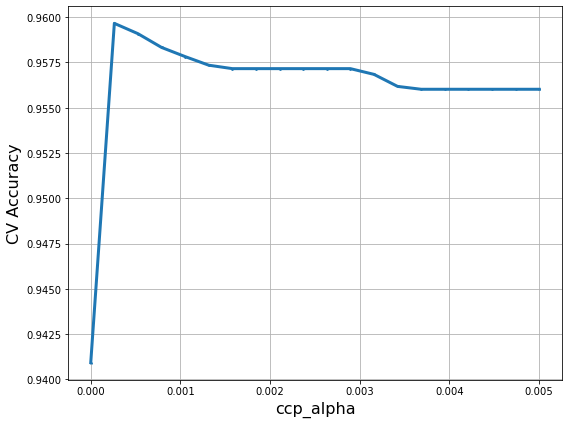

Best ccp_alpha {'ccp_alpha': 0.0002631578947368421}


In [30]:
ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

Node count = 51


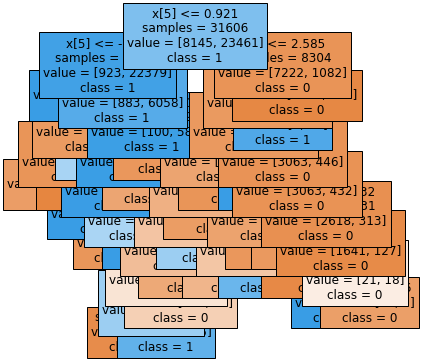

In [31]:
from sklearn.tree import plot_tree

print('Node count =', dtc_cv.best_estimator_.tree_.node_count)
plt.figure(figsize=(6,6))
plot_tree(dtc_cv.best_estimator_, 
#           feature_names=X_reduced_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          fontsize=12) 
plt.show()

In [32]:
# Obtain the feature importances of the best model
importances = dtc_cv.best_estimator_.feature_importances_

# Obtain the indices of the feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Select the first 20 indices from the sorted indices list
top_20_indices = sorted_indices[:20]

# Obtain the names of the top 10 features
cart_top_20_features = X.columns[top_20_indices]

print(cart_top_20_features)

Index(['NOT_HOUR', 'STATE_13', 'NOT_MIN', 'STATE_5', 'ARR_HOUR', 'STATE_6',
       'STATE_10', 'STATE_9', 'STATE_15', 'PEDS', 'VE_TOTAL', 'PERMVIT',
       'DAYNAME', 'STATE_2', 'STATE_1', 'STATE_4', 'STATE_8', 'STATE_11',
       'STATE_12', 'ST_CASE'],
      dtype='object')


In [33]:
cart_MAE = MAE(y_val, y_pred)
cart_RMSE = RMSE(y_val, y_pred)
cart_OSR2 = OSR2(y_train, y_val, y_pred)

In [34]:
cart_MAE_test = MAE(y_test, y_pred_test)
cart_RMSE_test = RMSE(y_test, y_pred_test)
cart_OSR2_test = OSR2(y_train, y_test, y_pred_test)

## LDA Model

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda_mod = lda.fit(X_train_reduced, y_train)
y_pred = lda_mod.predict(X_val_reduced)
y_pred_test = lda_mod.predict(X_test_reduced)

In [36]:
# Obtain the coefficients of the LDA transformation
coef = lda_mod.coef_

# Compute the absolute value of the coefficients
abs_coef = np.abs(coef)

# Obtain the indices of the coefficients in descending order
sorted_indices = np.argsort(abs_coef)[::-1]

# Select the first 20 indices from the sorted indices list
top_20_indices = sorted_indices[:20]

# Obtain the names of the top 20 features
lda_top_20_features = X.columns[top_20_indices]

print(lda_top_20_features)

[['ST_CASE' 'VE_TOTAL' 'PERMVIT' 'PEDS' 'DAYNAME' 'ARR_HOUR' 'STATE_11'
  'STATE_4' 'NOT_MIN' 'STATE_10' 'STATE_8' 'STATE_1' 'STATE_12' 'STATE_9'
  'STATE_6' 'STATE_15' 'STATE_2' 'STATE_5' 'NOT_HOUR' 'STATE_13']]


<ipython-input-36-71fd57983caa>:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lda_top_20_features = X.columns[top_20_indices]


In [37]:
lda_MAE = MAE(y_val, y_pred)
lda_RMSE = RMSE(y_val, y_pred)
lda_OSR2 = OSR2(y_train, y_val, y_pred)

In [38]:
lda_MAE_test = MAE(y_test, y_pred_test)
lda_RMSE_test = RMSE(y_test, y_pred_test)
lda_OSR2_test = OSR2(y_train, y_test, y_pred_test)

## Baseline Model

In [39]:
from sklearn.dummy import DummyClassifier

# Instantiate a dummy classifier with the strategy "most frequent"
dummy_clf = DummyClassifier(strategy="most_frequent")

# Fit the classifier to the training data
dummy_clf.fit(X_train_reduced, y_train)

# Predict the labels of the test data
y_pred = dummy_clf.predict(X_val_reduced)

In [40]:
baseline_MAE = MAE(y_val, y_pred)
baseline_RMSE = RMSE(y_val, y_pred)
baseline_OSR2 = OSR2(y_train, y_val, y_pred)

## Boosting

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=1000)

# Train the classifier on the training data
gb.fit(X_train_reduced, y_train)

# Predict the labels of the bootstrap sample
y_pred = gb.predict(X_val_reduced)
y_pred_test = gb.predict(X_test_reduced)


In [42]:
boosting_MAE = MAE(y_val, y_pred)
boosting_RMSE = RMSE(y_val, y_pred)
boosting_OSR2 = OSR2(y_train, y_val, y_pred)

In [43]:
boosting_MAE_test = MAE(y_test, y_pred_test)
boosting_RMSE_test = RMSE(y_test, y_pred_test)
boosting_OSR2_test = OSR2(y_train, y_test, y_pred_test)

## Comparison Table

In [44]:
# print('Validation Set')
#Create Comparison Table
comparison_data = {'Baseline':[baseline_OSR2,baseline_MAE,baseline_RMSE],
                   'Linear Regression':[sm_OSR2,sm_MAE,sm_RMSE],
                   'CART with CV':[cart_OSR2,cart_MAE,cart_RMSE],
                   'Random Forest':[rf_OSR2,rf_MAE,rf_RMSE],
                   'Linear Discriminant Analysis':[lda_OSR2,lda_MAE, lda_RMSE],
                   'Boosting':[boosting_OSR2,boosting_MAE, boosting_RMSE]}

comparison_table = pd.DataFrame(data=comparison_data, index=['OSR2', 'MAE', 'RMSE']).transpose()
comparison_table.style.set_properties(**{'font-size': '12pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}])
comparison_table

,OSR2,MAE,RMSE
Baseline,-0.352556,0.260693,0.510582
Linear Regression,0.621103,0.189651,0.270239
CART with CV,0.795147,0.039484,0.198705
Random Forest,0.796460,0.039231,0.198067
Linear Discriminant Analysis,0.636254,0.070109,0.264781
Boosting,0.796460,0.039231,0.198067


In [45]:
# Display the comparison table
print('Linear Regression \n', lr_top_20_features)
print('\nRandom Forest\n', rf_top_20_features)
print('\nCART with CV\n', cart_top_20_features)
print('\nLinear Discriminant Analysis\n', lda_top_20_features)

Linear Regression 
 Index(['STATE_13', 'NOT_HOUR', 'STATE_5', 'STATE_2', 'STATE_15', 'STATE_6',
       'STATE_9', 'STATE_12', 'STATE_1', 'STATE_8', 'STATE_10', 'NOT_MIN',
       'STATE_4', 'STATE_11', 'ARR_HOUR', 'DAYNAME', 'PEDS', 'PERMVIT',
       'VE_TOTAL', 'ST_CASE'],
      dtype='object')

Random Forest
 Index(['NOT_HOUR', 'STATE_13', 'STATE_5', 'NOT_MIN', 'STATE_2', 'ARR_HOUR',
       'STATE_1', 'STATE_6', 'STATE_4', 'STATE_10', 'STATE_9', 'STATE_15',
       'STATE_8', 'PEDS', 'STATE_11', 'STATE_12', 'ST_CASE', 'PERMVIT',
       'DAYNAME', 'VE_TOTAL'],
      dtype='object')

CART with CV
 Index(['NOT_HOUR', 'STATE_13', 'NOT_MIN', 'STATE_5', 'ARR_HOUR', 'STATE_6',
       'STATE_10', 'STATE_9', 'STATE_15', 'PEDS', 'VE_TOTAL', 'PERMVIT',
       'DAYNAME', 'STATE_2', 'STATE_1', 'STATE_4', 'STATE_8', 'STATE_11',
       'STATE_12', 'ST_CASE'],
      dtype='object')

Linear Discriminant Analysis
 [['ST_CASE' 'VE_TOTAL' 'PERMVIT' 'PEDS' 'DAYNAME' 'ARR_HOUR' 'STATE_11'
  'STATE_4' 'NOT_M

## Model Blending

In [46]:
rf_val_preds = rf_mod.predict(X_val_reduced)
lr_val_preds = lr_mod.predict(X_val_reduced)
cart_val_preds = dtc_cv.predict(X_val_reduced)
lda_val_preds = lda_mod.predict(X_val_reduced)
boosting_val_preds = lda_mod.predict(X_val_reduced)

In [47]:
df_pred = pd.DataFrame({'y_rf': rf_val_preds, 'y_lr': lr_val_preds, 'y_cart': cart_val_preds, 'y_lda': lda_val_preds, 'y_boosting': boosting_val_preds})

# concatenate with the original training set
df_train = pd.concat([df_pred, X_train, y_train], axis=1)

In [48]:
import statsmodels.formula.api as smf
# fit an OLS model on the concatenated data
model_ols = smf.ols('FATAL_RATE ~ y_rf + y_lr + y_cart + y_lda + y_boosting -1', data=df_train).fit()

# predict on the test set using the OLS model
y_pred_blend = model_ols.predict(df_pred)

# blending_res = model_ols.fit()
print(model_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:             FATAL_RATE   R-squared (uncentered):                   0.602
Model:                            OLS   Adj. R-squared (uncentered):              0.601
Method:                 Least Squares   F-statistic:                              1178.
Date:                Wed, 03 May 2023   Prob (F-statistic):                        0.00
Time:                        15:47:09   Log-Likelihood:                         -2529.6
No. Observations:                3119   AIC:                                      5067.
Df Residuals:                    3115   BIC:                                      5091.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [49]:
blend_MAE = MAE(y_test, y_pred_blend)
blend_RMSE = RMSE(y_test, y_pred_blend)
blend_OSR2 = OSR2(y_train, y_test, y_pred_blend)

In [50]:
import statsmodels.formula.api as smf
# fit an OLS model on the concatenated data
model_ols = smf.ols('FATAL_RATE ~ y_rf + y_cart + y_lda + y_boosting -1', data=df_train).fit()

# predict on the test set using the OLS model
y_pred_blend_1 = model_ols.predict(df_pred)

# blending_res = model_ols.fit()
print(model_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:             FATAL_RATE   R-squared (uncentered):                   0.547
Model:                            OLS   Adj. R-squared (uncentered):              0.547
Method:                 Least Squares   F-statistic:                              1256.
Date:                Wed, 03 May 2023   Prob (F-statistic):                        0.00
Time:                        15:47:09   Log-Likelihood:                         -2729.9
No. Observations:                3119   AIC:                                      5466.
Df Residuals:                    3116   BIC:                                      5484.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [51]:
blend_MAE_1 = MAE(y_test, y_pred_blend_1)
blend_RMSE_1 = RMSE(y_test, y_pred_blend_1)
blend_OSR2_1 = OSR2(y_train, y_test, y_pred_blend_1)

## Comparison Table

In [52]:
print('Test Set')
#Create Comparison Table
comparison_data = {
                   'Blending':[blend_OSR2,blend_MAE,blend_RMSE],
                   'Blending without LR':[blend_OSR2_1,blend_MAE_1,blend_RMSE_1],
                   'Linear Regression':[sm_OSR2_test,sm_MAE_test,sm_RMSE_test],
                   'CART with CV':[cart_OSR2_test,cart_MAE_test,cart_RMSE_test],
                   'Random Forest':[rf_OSR2_test,rf_MAE_test,rf_RMSE_test],
                   'Linear Discriminant Analysis':[lda_OSR2_test,lda_MAE_test,lda_RMSE_test],
                   'Boosting':[boosting_OSR2_test,boosting_MAE_test, boosting_RMSE_test]
                   }

comparison_table = pd.DataFrame(data=comparison_data, index=['OSR2', 'MAE', 'RMSE']).transpose()
comparison_table.style.set_properties(**{'font-size': '12pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}])
comparison_table

Test Set


,OSR2,MAE,RMSE
Blending,0.852073,0.443549,0.518969
Blending without LR,0.829047,0.450769,0.557901
Linear Regression,0.670838,0.185474,0.250594
CART with CV,0.798346,0.038471,0.196141
Random Forest,0.811613,0.035940,0.189579
Linear Discriminant Analysis,0.648433,0.067072,0.258982
Boosting,0.812940,0.035687,0.188910
